## Stack - Projeto Human Resources Analytics

### Machine Learning.

In [3]:
import pandas as pd
import datetime
import glob
from minio import Minio
import numpy as np
import matplotlib.pyplot as plt

Conectando com o Minio

In [4]:
client = Minio(
        "localhost:9000",
        access_key="minioadmin",
        secret_key="minioadmin",
        secure=False
    )

### Baixando o Dataset do Data Lake.

In [5]:
client.fget_object(
            "processing",
            "employees_dataset.parquet",
            "temp_.parquet",
)
df = pd.read_parquet("temp_.parquet")

In [6]:
df.head()

,department,salary,left,department.1,salary.1,left.1,department.1.1,salary.1.1,left.1.1,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident
0,sales,low,1.0,sales,low,1.0,sales,low,1.0,266.000000,2.0,38.0,53.0,3.0,0.0
1,sales,medium,1.0,sales,medium,1.0,sales,medium,1.0,252.000000,5.0,80.0,86.0,6.0,0.0
2,sales,medium,1.0,sales,medium,1.0,sales,medium,1.0,289.666667,7.0,11.0,88.0,4.0,0.0
3,sales,low,1.0,sales,low,1.0,sales,low,1.0,275.666667,5.0,72.0,87.0,5.0,0.0
4,sales,low,1.0,sales,low,1.0,sales,low,1.0,292.333333,2.0,37.0,52.0,3.0,0.0


In [7]:
# Remove columns
df = df.drop(['department.1', 'salary.1', 'left.1', 'department.1.1', 'salary.1.1', 'left.1.1'], axis = 1)

In [8]:
df.head()

,department,salary,left,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident
0,sales,low,1.0,266.000000,2.0,38.0,53.0,3.0,0.0
1,sales,medium,1.0,252.000000,5.0,80.0,86.0,6.0,0.0
2,sales,medium,1.0,289.666667,7.0,11.0,88.0,4.0,0.0
3,sales,low,1.0,275.666667,5.0,72.0,87.0,5.0,0.0
4,sales,low,1.0,292.333333,2.0,37.0,52.0,3.0,0.0


#### Organizando o dataset.

In [9]:
df = df[['department', 'salary', 'mean_work_last_3_months',
       'number_projects', 'satisfaction_level', 'last_evaluation',
       'time_in_company', 'work_accident','left']]

In [10]:
df.head()

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266.000000,2.0,38.0,53.0,3.0,0.0,1.0
1,sales,medium,252.000000,5.0,80.0,86.0,6.0,0.0,1.0
2,sales,medium,289.666667,7.0,11.0,88.0,4.0,0.0,1.0
3,sales,low,275.666667,5.0,72.0,87.0,5.0,0.0,1.0
4,sales,low,292.333333,2.0,37.0,52.0,3.0,0.0,1.0


#### Verificando os registros missing.

In [11]:
df.isnull().sum()

department                 1
salary                     1
mean_work_last_3_months    0
number_projects            1
satisfaction_level         1
last_evaluation            1
time_in_company            1
work_accident              1
left                       1
dtype: int64

In [12]:
df[df.notnull()]

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266.000000,2.0,38.0,53.0,3.0,0.0,1.0
1,sales,medium,252.000000,5.0,80.0,86.0,6.0,0.0,1.0
2,sales,medium,289.666667,7.0,11.0,88.0,4.0,0.0,1.0
3,sales,low,275.666667,5.0,72.0,87.0,5.0,0.0,1.0
4,sales,low,292.333333,2.0,37.0,52.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
14995,technical,low,253.333333,2.0,37.0,48.0,3.0,0.0,1.0
14996,technical,medium,288.000000,2.0,37.0,53.0,3.0,0.0,1.0
14997,support,low,272.000000,6.0,11.0,96.0,4.0,0.0,1.0
14998,support,low,276.666667,2.0,37.0,52.0,3.0,0.0,1.0


In [13]:
df = df[:14998]

#### Alterando os tipos de dados.

In [14]:
df["number_projects"] = df["number_projects"].astype(int)
df["mean_work_last_3_months"] = df["mean_work_last_3_months"].astype(int)
df["time_in_company"] = df["time_in_company"].astype(int)
df["work_accident"] = df["work_accident"].astype(int)
df["left"] = df["left"].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   department               14998 non-null  object 
 1   salary                   14998 non-null  object 
 2   mean_work_last_3_months  14998 non-null  int32  
 3   number_projects          14998 non-null  int32  
 4   satisfaction_level       14998 non-null  float64
 5   last_evaluation          14998 non-null  float64
 6   time_in_company          14998 non-null  int32  
 7   work_accident            14998 non-null  int32  
 8   left                     14998 non-null  int32  
dtypes: float64(2), int32(5), object(2)
memory usage: 761.7+ KB


In [16]:
df.head()

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266,2,38.0,53.0,3,0,1
1,sales,medium,252,5,80.0,86.0,6,0,1
2,sales,medium,289,7,11.0,88.0,4,0,1
3,sales,low,275,5,72.0,87.0,5,0,1
4,sales,low,292,2,37.0,52.0,3,0,1


In [17]:
df = df[:14998]

#### Renomeando atributos

In [18]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_projects': 'projectCount',
                        'mean_work_last_3_months': 'averageMonthlyHours',
                        'time_in_company': 'yearsAtCompany',
                        'work_accident': 'workAccident',
                        'left' : 'turnover'
                        })

In [19]:
df.head()

,department,salary,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
0,sales,low,266,2,38.0,53.0,3,0,1
1,sales,medium,252,5,80.0,86.0,6,0,1
2,sales,medium,289,7,11.0,88.0,4,0,1
3,sales,low,275,5,72.0,87.0,5,0,1
4,sales,low,292,2,37.0,52.0,3,0,1


## Preprocessamento

#### Converte os atributos categoricos valores numéricos.

In [20]:
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

In [21]:
df.head()

,department,salary,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
0,7,1,266,2,38.0,53.0,3,0,1
1,7,2,252,5,80.0,86.0,6,0,1
2,7,2,289,7,11.0,88.0,4,0,1
3,7,1,275,5,72.0,87.0,5,0,1
4,7,1,292,2,37.0,52.0,3,0,1


#### Separando as variáveis

In [22]:
target_name = 'turnover'
# excluir a variáveil turnover
X = df.drop('turnover', axis=1)
X.head()

,department,salary,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident
0,7,1,266,2,38.0,53.0,3,0
1,7,2,252,5,80.0,86.0,6,0
2,7,2,289,7,11.0,88.0,4,0
3,7,1,275,5,72.0,87.0,5,0
4,7,1,292,2,37.0,52.0,3,0


In [23]:
# Base com apenas a variável Target
y = df[target_name]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: turnover, dtype: int32

#### Transformando os dados.

Queremos que os dados estejam em escalas semalhantes. Diferenças de escala podem atrapalhar na modelagem do problema.

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
X = scaler.fit_transform(X)

In [27]:
X

array([[0.77777778, 0.5       , 0.38202247, ..., 0.265625  , 0.125     ,
        0.        ],
       [0.77777778, 1.        , 0.2247191 , ..., 0.78125   , 0.5       ,
        0.        ],
       [0.77777778, 1.        , 0.64044944, ..., 0.8125    , 0.25      ,
        0.        ],
       ...,
       [1.        , 0.5       , 0.23595506, ..., 0.1875    , 0.125     ,
        0.        ],
       [1.        , 1.        , 0.62921348, ..., 0.265625  , 0.125     ,
        0.        ],
       [0.88888889, 0.5       , 0.4494382 , ..., 0.9375    , 0.25      ,
        0.        ]])

### Separando os conjuntos de dados em treino e teste

<img src="https://www.researchgate.net/profile/Brian-Mwandau/publication/325870973/figure/fig6/AS:639531594285060@1529487622235/Train-Test-Data-Split.png" align="left">

Em geral, temos 80% dos dados para treino e 20% para teste.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# separação dos dados
X_train, X_test, y_train, y_test = train_test_split(
        X
       ,y
       ,test_size = 0.2
       ,random_state = 123
       ,stratify = y
)

- **teste_size** -> determina o tamanho da sua base de teste, neste caso 20%;
- **randow_state** -> semente aleatória
- **stratify** = y -> fazer separação de treino e teste respeitando o balanceamento das classes (target). Caso não haja respeito a isso, pode haver viés na estimação. 

#### Treinando o algoritmo de arvore de decisão.

In [30]:
from sklearn.tree import DecisionTreeClassifier

Vamos rodar uma árvores de decisão para classificar os dados

In [31]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)

Vamos escolher as features mais importantes do modelo

In [32]:
importances = dtree.feature_importances_
importances

array([0.08088418, 0.02259097, 0.18531629, 0.0766295 , 0.33247735,
       0.19438783, 0.09436866, 0.01334521])

In [33]:
feat_names = df.drop(['turnover'],axis=1).columns
feat_names

Index(['department', 'salary', 'averageMonthlyHours', 'projectCount',
       'satisfaction', 'evaluation', 'yearsAtCompany', 'workAccident'],
      dtype='object')

In [34]:
indices = np.argsort(importances)[::-1]
indices

array([4, 5, 2, 6, 0, 3, 1, 7], dtype=int64)

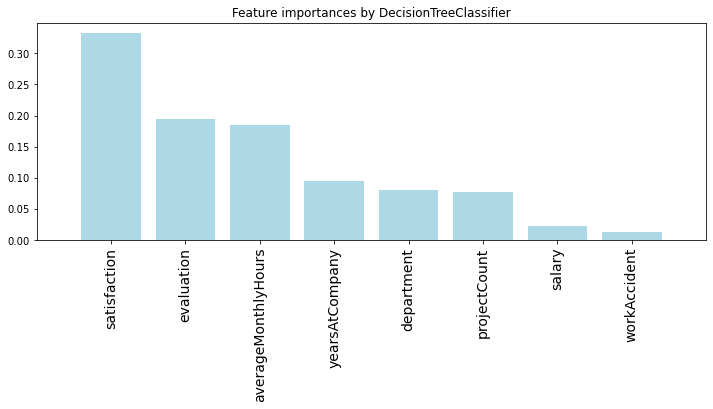

In [35]:
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,4))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical', fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

#### Filtrando apenas os atributos relevantes.

Vamos selecionar apenas o quatro primeiros features.

In [36]:
X = df[["satisfaction","evaluation","averageMonthlyHours","yearsAtCompany"]]

#### Separando os conjuntos de dados.

In [37]:
scaler = MinMaxScaler()

In [38]:
X = scaler.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
        X
       ,y
       ,test_size = 0.2
       ,random_state = 123
       ,stratify = y
)

In [40]:
X_train

array([[0.59340659, 0.21875   , 0.40449438, 0.125     ],
       [0.        , 0.703125  , 0.41573034, 0.25      ],
       [0.3956044 , 0.28125   , 0.58426966, 0.125     ],
       ...,
       [0.32967033, 0.3125    , 0.59550562, 0.125     ],
       [0.92307692, 0.28125   , 0.46067416, 0.        ],
       [0.51648352, 0.5       , 0.53932584, 0.125     ]])

#### Função do modelo de base.

Verificar o baseline que é o modelo da média (modelo mais simples) para verificar se o modelo criado pelo Machine Learning é melhor do que esse modelo mais simples.

In [41]:
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

#### Importando métodos de métrica de avaliação.

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [43]:
def accuracy_result(y_test,y_predict):
    acc = accuracy_score(y_test, y_predict)
    print ("Accuracy = %2.2f" % acc)

In [44]:
def roc_classification_report_results(model,y_test,y_predict):
    roc_ = roc_auc_score(y_test, y_predict)
    classfication_report = classification_report(y_test, y_predict)
    
    print ("\n{} AUC = {}\n".format(model, roc_))
    print(classfication_report)

#### Análise do modelo de baseline

In [45]:
y_predict = base_rate_model(X_test)

In [46]:
accuracy_result(y_test, y_predict)

Accuracy = 0.76


In [47]:
roc_classification_report_results("Base Model", y_test, y_predict)


Base Model AUC = 0.5

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      2286
           1       0.00      0.00      0.00       714

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.58      0.76      0.66      3000



C:\Users\euler\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Modelo de Regressão Logística.

<img src="https://editor.analyticsvidhya.com/uploads/95588WhatsApp-Image-2020-02-11-at-8.30.11-PM.jpeg" align="left">

#### Instânciando o algoritmo.

In [48]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

#### Realizando o treinamento.

In [49]:
logis.fit(X_train, y_train)

LogisticRegression()

#### Calculando as predições.

In [50]:
y_predict = logis.predict(X_test)

#### Avaliando o resultado.

In [51]:
accuracy_result(y_test, y_predict)

Accuracy = 0.77


In [52]:
roc_classification_report_results("Logistic Regression", y_test, y_predict)


Logistic Regression AUC = 0.5406235985207731

              precision    recall  f1-score   support

           0       0.78      0.97      0.86      2286
           1       0.55      0.11      0.18       714

    accuracy                           0.77      3000
   macro avg       0.66      0.54      0.52      3000
weighted avg       0.72      0.77      0.70      3000



### Modelo de Arvore de decisão.

<img src="https://www.devops.ae/wp-content/uploads/2021/04/decision-tree-classification-algorithm.png" align="left">

#### Instânciando o algoritmo.

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

#### Realizando o treinamento.

In [54]:
dtree = dtree.fit(X_train,y_train)

#### Calculando as predições.

In [55]:
y_predict = dtree.predict(X_test)

#### Avaliando o resultado.

In [56]:
accuracy_result(y_test, y_predict)

Accuracy = 0.74


In [57]:
roc_classification_report_results("Decision Tree", y_test, y_predict)


Decision Tree AUC = 0.6622940514788592

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2286
           1       0.46      0.51      0.48       714

    accuracy                           0.74      3000
   macro avg       0.65      0.66      0.66      3000
weighted avg       0.75      0.74      0.75      3000



### Modelo de Floresta Aleatória (Random Forest)

<img src="https://miro.medium.com/max/1200/0*YEwFetXQGPB8aDFV" align="left">

#### Instânciando o algoritmo.

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier()

#### Realizando o treinamento.

In [60]:
rf = rf.fit(X_train,y_train)

#### Calculando as predições.

In [61]:
y_predict = rf.predict(X_test)

#### Avaliando o resultado.

In [62]:
accuracy_result(y_test, y_predict)

Accuracy = 0.83


In [63]:
roc_classification_report_results("Random Forest", y_test, y_predict)


Random Forest AUC = 0.7287489799069233

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2286
           1       0.69      0.53      0.60       714

    accuracy                           0.83      3000
   macro avg       0.78      0.73      0.75      3000
weighted avg       0.82      0.83      0.82      3000



Questionamentos:

* O que seria o:
    * precision ->
    * recall ->
    * f1-score ->
    * support ->

---

## Usando Pycaret

<img src="https://miro.medium.com/max/1024/0*T3u62CFmhRgur_ZZ.png" align="left">

<img src="https://i.pinimg.com/originals/28/c3/de/28c3decb69d2b89c42e3979a9565d84b.jpg" align="left">

In [64]:
# install the full version of pycaret
#!pip install pycaret
# !pip install pycaret --user

Watching this to install pycaret -> https://www.youtube.com/watch?v=WQAKswAS7Fs

Documentation -> https://pycaret.readthedocs.io/en/latest/installation.html

#### Importando os métodos.

In [65]:
from pycaret.classification import *

#### Definindo o Setup.

* target -> indica a variável target, neste caso 'turnover'
* numeric_features -> indica as variáveis númericas
* normalize -> padroniza os dados para rodar a previsão
* normalize_method -> indica o método de normalização
* data_split_stratify -> definir que o split será feito de forma estratificado
* fix_imbalance -> técnica para trabalhar com balanceamento

In [67]:
# Vamos fazer o setup do machine learning aqui
s = setup( df[["satisfaction","evaluation","averageMonthlyHours","yearsAtCompany","turnover"]]
          ,target = "turnover"
          ,numeric_features = ["yearsAtCompany"]
          ,normalize = True
          ,normalize_method = "minmax"
          ,data_split_stratify = True
          ,fix_imbalance = True,
         )

,Description,Value
0,session_id,3996
1,Target,turnover
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(14998, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


Preciso confirmar para continuar (espaço vazio).

#### Comparando diferentes modelos.

In [68]:
best = compare_models(fold = 5,sort = 'AUC')
# AUC -> Curva ROC

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8334,0.8064,0.6811,0.6415,0.6606,0.5503,0.5509,0.2320
lightgbm,Light Gradient Boosting Machine,0.8475,0.8032,0.6547,0.6895,0.6715,0.5723,0.5727,0.1900
ada,Ada Boost Classifier,0.8108,0.7967,0.6739,0.5899,0.6291,0.5029,0.5049,0.0960
rf,Random Forest Classifier,0.8183,0.7806,0.5698,0.6317,0.5990,0.4820,0.4832,0.3200
qda,Quadratic Discriminant Analysis,0.7263,0.7641,0.7575,0.4552,0.5687,0.3860,0.4129,0.0160
et,Extra Trees Classifier,0.8138,0.7579,0.5538,0.6224,0.5858,0.4663,0.4678,0.2640
knn,K Neighbors Classifier,0.7193,0.7499,0.6939,0.4432,0.5407,0.3526,0.3711,0.4100
nb,Naive Bayes,0.7097,0.7150,0.5942,0.4223,0.4937,0.2983,0.3069,0.0100
lr,Logistic Regression,0.6861,0.7063,0.6367,0.4002,0.4914,0.2812,0.2970,0.6160
lda,Linear Discriminant Analysis,0.6888,0.7051,0.6299,0.4022,0.4909,0.2823,0.2970,0.0140


#### Criando o modelo.

In [70]:
# Vamos criar o modelo de Gradient Boost (gbc) que foi escolhido na etapa anterior
gbc = create_model('gbc', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8324,0.8099,0.6620,0.6440,0.6529,0.5424,0.5425
1,0.8310,0.8031,0.6880,0.6335,0.6596,0.5474,0.5483
2,0.8395,0.8077,0.6780,0.6583,0.6680,0.5622,0.5623
3,0.8313,0.8107,0.6940,0.6332,0.6622,0.5501,0.5512
4,0.8328,0.8010,0.6834,0.6386,0.6602,0.5495,0.5500
Mean,0.8334,0.8064,0.6811,0.6415,0.6606,0.5503,0.5509
SD,0.0031,0.0038,0.0109,0.0092,0.0049,0.0065,0.0065


#### Realizando o tunning do modelo.

In [71]:
tuned_gbc = tune_model(gbc
                      ,fold = 5
                      ,custom_grid = {
                                      "learning_rate":[0.1,0.2,0.5]
                                     ,"n_estimators":[100,500,1000]
                                     ,"min_samples_split":[1,2,5,10]
                                     ,"max_depth":[1,3,9]
                                     }
                      ,optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8324,0.8099,0.6620,0.6440,0.6529,0.5424,0.5425
1,0.8310,0.8031,0.6880,0.6335,0.6596,0.5474,0.5483
2,0.8395,0.8077,0.6780,0.6583,0.6680,0.5622,0.5623
3,0.8313,0.8107,0.6940,0.6332,0.6622,0.5501,0.5512
4,0.8328,0.8010,0.6834,0.6386,0.6602,0.5495,0.5500
Mean,0.8334,0.8064,0.6811,0.6415,0.6606,0.5503,0.5509
SD,0.0031,0.0038,0.0109,0.0092,0.0049,0.0065,0.0065


In [72]:
# Faremos a predição usando o modelo gbc escolhido
predict_model(gbc, data=df)

,department,salary,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover,Label,Score
0,7,1,266,2,38.0,53.0,3,0,1,1,0.8592
1,7,2,252,5,80.0,86.0,6,0,1,1,0.5962
2,7,2,289,7,11.0,88.0,4,0,1,1,0.8613
3,7,1,275,5,72.0,87.0,5,0,1,1,0.8109
4,7,1,292,2,37.0,52.0,3,0,1,1,0.8521
...,...,...,...,...,...,...,...,...,...,...,...
14993,7,1,279,6,76.0,83.0,6,0,1,1,0.5814
14994,7,1,287,2,40.0,57.0,3,0,1,1,0.7792
14995,9,1,253,2,37.0,48.0,3,0,1,1,0.8476
14996,9,2,288,2,37.0,53.0,3,0,1,1,0.8521


O que seria o score no machine learning?

- https://www.mariofilho.com/as-metricas-mais-populares-para-avaliar-modelos-de-machine-learning/


#### Finalizando o modelo.

In [73]:
final_model = finalize_model(gbc)

In [74]:
final_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3996, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [75]:
save_model(final_model,'model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['yearsAtCompany'],
                                       target='turnover', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
            

Ficou salvo em disco com nome 'model.pkl'

#### Transferindo os arquivos para o Data Lake.

#### Modelo de Classificação.

In [77]:
client.fput_object(
    "curated",
    "model.pkl",
    "model.pkl"
)

* curated -> salvo no data lake na área de curated
* model.pkl -> salvo o modelo 'model.pkl'
* model.pkl -> salvo com o mesmo nome

#### Exportando o conjunto de dados para o disco.

In [78]:
df[["satisfaction","evaluation","averageMonthlyHours","yearsAtCompany","turnover"]].to_csv("dataset.csv",index=False)

In [79]:
client.fput_object(
    "curated",
    "dataset.csv",
    "dataset.csv"
)

In [ ]:
pip 